In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [2]:
segments = pd.read_csv("../data/user_segments.csv")
adoption = pd.read_csv("../data/feature_adoption.csv")

In [6]:
# Join
df = adoption.merge(segments, on="user_id")

In [7]:
# Segment-based adoption rate
adoption_rates = df.groupby(["segment", "feature_name"])["adopted"].mean().reset_index()

print(adoption_rates.head())


         segment    feature_name   adopted
0  active_trader  advanced_chart  0.375626
1  active_trader     auto_invest  0.400668
2  active_trader       news_feed  0.368948
3      long_term  advanced_chart  0.357983
4      long_term     auto_invest  0.420168


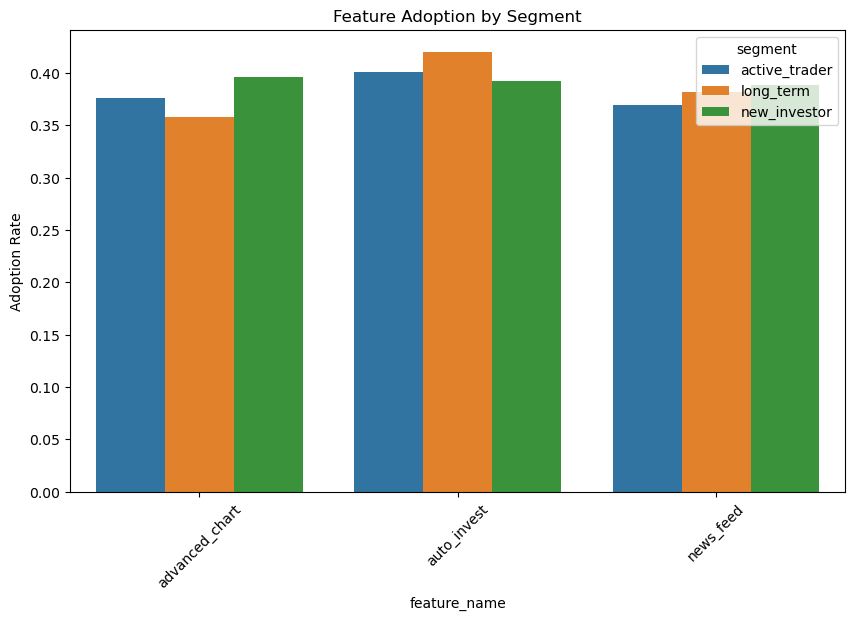

In [9]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    data=adoption_rates,
    x="feature_name",
    y="adopted",
    hue="segment"
)
plt.ylabel("Adoption Rate")
plt.xticks(rotation=45)
plt.title("Feature Adoption by Segment")
plt.show()


In [11]:
# Statistical test: Chi-square
contingency = pd.crosstab(df["segment"], df["adopted"])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square:", chi2, "p-value:", p)

Chi-square: 0.46844825079014085 p-value: 0.7911844714903875


In [13]:
df

,user_id,feature_name,adopted,segment,intercept
0,100000,advanced_chart,0,new_investor,1
1,100000,auto_invest,0,new_investor,1
2,100000,news_feed,1,new_investor,1
3,100001,advanced_chart,0,long_term,1
4,100001,auto_invest,0,long_term,1
...,...,...,...,...,...
5995,101998,auto_invest,0,new_investor,1
5996,101998,news_feed,0,new_investor,1
5997,101999,advanced_chart,0,new_investor,1
5998,101999,auto_invest,1,new_investor,1
